# Implementación del Algoritmo DBSCAN en un Jupyter Notebook 
## Ulises Aquiles Muñoz Altamirano
#### En este Jupyter Notebook se mostrara la implementacion del algoritmo DBSCAN en un dataset de sklearn "iris".

In [1]:
import warnings
warnings.filterwarnings('ignore')

#### Se cargan las librerias necesarias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import datasets

#### Se cargan y muestran los datos

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

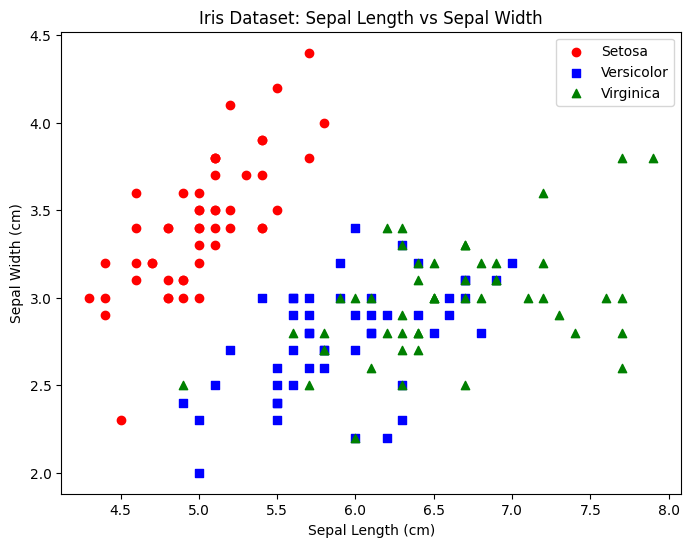

In [4]:
plt.figure(figsize=(8, 6))

plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Setosa', c='red', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Versicolor', c='blue', marker='s')
plt.scatter(X[y == 2, 0], X[y == 2, 1], label='Virginica', c='green', marker='^')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset: Sepal Length vs Sepal Width')
plt.legend(loc='upper right')

plt.show()

#### De acuerdo a lo visto, se va a necesitar un "eps" de considerable tamaño para que considere los puntos que se encuentran alejados parte del cluster y no como ruido, ademas el "min_samples" no tendra que ser muy grande debido a que no se encuentra muchos puntos en los datos.

#### Se implementa el codigo para utilizar DBSCAN con un "eps" de 1 y un "min_samples" de 4, mostrando en un grafico los clusters encontrados

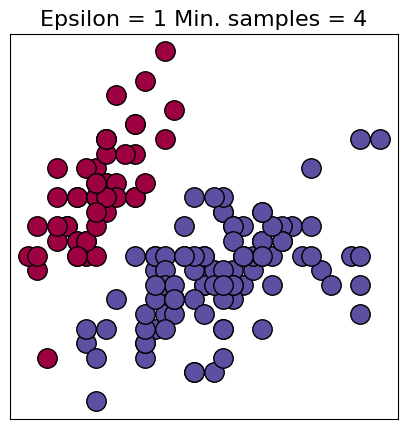

In [5]:
eps = 1
min_samples = 4

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X)

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title(f'Epsilon = {eps} Min. samples = {min_samples}', fontsize=16)

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
unique_labels = set(dbscan.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (dbscan.labels_ == k)
    xy = X[class_member_mask & core_samples_mask]
    ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

ax.set_xticks([])
ax.set_yticks([])

plt.show(fig)
plt.close(fig)

### Observaciones del grafico realizado:
#### Del grafico se puede observar que genero dos clusters de datos, pero segun el dataset deberian ser tres clusters.
#### El grupo de "Setosa" lo logro identificar sin problemas, pero debido a que los otros dos grupos de datos se sobreponian el algoritmo los identifico como parte del mismo cluster.

### Observaciones del Algoritmo DBSCAN:
#### Para este dataset el algoritmo logro agrupar los datos de manera parcialmente correcta, debido a lo mencionado anteriormente que el grupo "Setosa" lo identifico exitosamente pero los otros dos grupos de datos los agrupo en el mismo cluster.
#### Para este dataset no es pertinente el algoritmo DBSCAN debido a que tiene problemas cuando datos de diferente grupos se sobreponen.